# MARATÓN BEHIND THE CODE 2020

## DESAFÍO 2: PARTE 1

### Introducción

En proyectos de ciencia de datos destinados a construir modelos de *aprendizaje automático*, o aprendizaje estadístico, es muy inusual que los datos iniciales ya estén en el formato ideal para la construcción de modelos. Se requieren varios pasos intermedios de preprocesamiento de datos, como la codificación de variables categóricas, normalización de variables numéricas, tratamiento de datos faltantes, etc. La biblioteca **scikit-learn**, una de las bibliotecas de código abierto más populares para *aprendizaje automático* en el mundo, ya tiene varias funciones integradas para realizar las transformaciones de datos más utilizadas. Sin embargo, en un flujo común de un modelo de aprendizaje automático, es necesario aplicar estas transformaciones al menos dos veces: la primera vez para "entrenar" el modelo, y luego nuevamente cuando se envían nuevos datos como entrada para ser clasificados por este modelo.

Para facilitar el trabajo con este tipo de flujos, scikit-learn también cuenta con una herramienta llamada **Pipeline**, que no es más que una lista ordenada de transformaciones que se deben aplicar a los datos. Para ayudar en el desarrollo y la gestión de todo el ciclo de vida de estas aplicaciones, además del uso de Pipelines, los equipos de científicos de datos pueden utilizar en conjunto **Watson Machine Learning**, que tiene docenas de herramientas para entrenar , gestionar, alojar y evaluar modelos basados ​​en el aprendizaje automático. Además, Watson Machine Learning es capaz de encapsular pipelines y modelos en una API lista para usar e integrarse con otras aplicaciones.

Durante el desafío 2, aprenderás como crear un **Pipeline** para un modelo de clasificación y alojarlo como una API con la ayuda de Watson Machine Learning. Una vez alojado, puedes integrar el modelo creado con otras aplicaciones, como asistentes virtuales y más. En este notebook, se presentará un ejemplo funcional de creación de un modelo y un pipeline en scikit-learn (¡que puedes usar como plantilla para tu solución!).

### Trabajando con Pipelines del scikit-learn

In [ ]:
# Primero, realizamos la instalación de scikit-learn versión 0.20.0 en el Kernel de este notebook:
!pip install scikit-learn==0.20.0 --upgrade

In [24]:
# A continuación importaremos varias bibliotecas que se utilizarán:

# Biblioteca para trabajar con JSON
import json

# Biblioteca para realizar solicitudes HTTP
import requests

# Biblioteca para exploración y análisis de datos
import pandas as pd

# Biblioteca con métodos numéricos y representaciones matriciales
import numpy as np

# Biblioteca para construir un modelo basado en la técnica Gradient Boosting
import xgboost as xgb

# Paquetes scikit-learn para preprocesamiento de datos
# "SimpleImputer" es una transformación para completar los valores faltantes en conjuntos de datos
from sklearn.impute import SimpleImputer

# Paquetes de scikit-learn para entrenamiento de modelos y construcción de pipelines
# Método para separar el conjunto de datos en muestras de testes y entrenamiento
from sklearn.model_selection import train_test_split
# Método para crear modelos basados en árboles de decisión
from sklearn.tree import DecisionTreeClassifier
# Clase para crear una pipeline de machine-learning
from sklearn.pipeline import Pipeline

# Paquetes scikit-learn para evaluación de modelos
# Métodos para la validación cruzada del modelo creado
from sklearn.model_selection import KFold, cross_validate
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

### Importar  un .csv a tu proyecto en IBM Cloud Pak for Data al Kernel de este notebook

Primero, importaremos el conjunto de datos proporcionado para el desafío, que ya está incluido en este proyecto.

Puedes importar datos desde un archivo .csv directamente al Kernel del portátil como un Pandas DataFrame, que se usa ampliamente para manipular datos en Python.

Para realizar la importación, simplemente selecciona la siguiente celda y siga las instrucciones en la imagen a continuación:

![alt text](https://i.imgur.com/K1DwL9I.png "importing-csv-as-df")

Después de seleccionar la opción **"Insertar en el código"**, la celda de abajo se llenará con el código necesario para importar y leer los datos en el archivo .csv como un Pandas DataFrame.

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_6de7dd23c5d0484ab588e2ca41cb2faa = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='vsu_vFJYT95osja2EPOX8ta8wDCUIcWLO6nbAGmsXb_P',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_6de7dd23c5d0484ab588e2ca41cb2faa.get_object(Bucket='desafio2tortuga-donotdelete-pr-8vuqmljhaidmva',Key='dataset-tortuga-desafio-2.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()

,Unnamed: 0,NAME,USER_ID,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
0,28,Stormy Muto,58283940,7.0,39.0,29.0,2.0,4.0,0.0,2.0,5.0,0.0,84.0,74.0,NaN,beginner_front_end
1,81,Carlos Ferro,1357218,32.0,0.0,44.0,2.0,0.0,0.0,0.0,5.0,0.0,67.0,45.0,NaN,beginner_front_end
2,89,Robby Constantini,63212105,45.0,0.0,59.0,0.0,5.0,4.0,0.0,4.0,1.0,NaN,54.0,47.0,advanced_front_end
3,138,Paul Mckenny,23239851,36.0,19.0,28.0,0.0,5.0,7.0,0.0,5.0,3.0,NaN,71.0,89.0,beginner_data_science
4,143,Jean Webb,72234478,61.0,78.0,38.0,6.0,11.0,0.0,4.0,3.0,0.0,66.0,85.0,NaN,advanced_front_end


Tenemos 16 columnas presentes en el set de datos proporcionado, 15 de las cuales son variables features (datos de entrada) y una de ellas es una variable target (que queremos que nuestro modelo va a predecir).

Las variables features son:

    Unnamed: 0                          - Esta columna no tiene nombre y debe ser eliminada del dataset
    NAME                                - Nombre del estudiante
    USER_ID                             - Número de identificación del estudiante
    HOURS_DATASCIENCE                   - Número de horas de estudio en Data Science
    HOURS_BACKEND                       - Número de horas de estudio en Web (Back-End)
    HOURS_FRONTEND                      - Número de horas de estudio en Web (Front-End)
    NUM_COURSES_BEGINNER_DATASCIENCE    - Número de cursos de nivel principiante en Data Science completados por el estudiante
    NUM_COURSES_BEGINNER_BACKEND        - Número de cursos de nivel principiante en Web (Back-End) completados por el estudiante
    NUM_COURSES_BEGINNER_FRONTEND       - Número de cursos de nivel principiante en Web (Front-End) completados por el estudiante
    NUM_COURSES_ADVANCED_DATASCIENCE    - Número de cursos de nivel avanzado en Data Science completados por el estudiante
    NUM_COURSES_ADVANCED_BACKEND        - Número de cursos de nivel avanzado en Web (Back-End) completados por el estudiante
    NUM_COURSES_ADVANCED_FRONTEND       - Número de cursos de nivel avanzado en Web (Front-End) completados por el estudiante
    AVG_SCORE_DATASCIENCE               - Promedio acumulado en cursos de Data Science completados por el estudiante
    AVG_SCORE_BACKEND                   - Promedio acumulado en cursos de Web (Back-End) completados por el estudiante
    AVG_SCORE_FRONTEND                  - Promedio acumulado en cursos de Web (Front-End) completados por el estudiante
    
La variable target es:

    PROFILE                             - Perfil de carrera del estudiante (puede ser uno de 6)
    
        - beginner_front_end
        - advanced_front_end
        - beginner_back_end
        - advanced_back_end
        - beginner_data_science
        - advanced_data_science
        
Con un modelo capaz de clasificar a un alumno en una de estas categorías, podemos recomendar contenidos a los alumnos de forma personalizada según las necesidades de cada alumno.

### Explorando los datos proporcionados

Podemos continuar la exploración de los datos proporcionados con la función ``info()``:

In [3]:
df_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 16 columns):
Unnamed: 0                          20000 non-null int64
NAME                                20000 non-null object
USER_ID                             20000 non-null int64
HOURS_DATASCIENCE                   19986 non-null float64
HOURS_BACKEND                       19947 non-null float64
HOURS_FRONTEND                      19984 non-null float64
NUM_COURSES_BEGINNER_DATASCIENCE    19974 non-null float64
NUM_COURSES_BEGINNER_BACKEND        19982 non-null float64
NUM_COURSES_BEGINNER_FRONTEND       19961 non-null float64
NUM_COURSES_ADVANCED_DATASCIENCE    19998 non-null float64
NUM_COURSES_ADVANCED_BACKEND        19992 non-null float64
NUM_COURSES_ADVANCED_FRONTEND       19963 non-null float64
AVG_SCORE_DATASCIENCE               19780 non-null float64
AVG_SCORE_BACKEND                   19916 non-null float64
AVG_SCORE_FRONTEND                  19832 non-null float64
PROFILE    

### Visualización (visualizations)

Para ver el conjunto de datos suministrado, podemos usar las bibliotecas ``matplotlib`` y ``seaborn``:

## 3. De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

* El histograma no ayuda a ver la distribución de los datos y para a obtener una referencia sobre posibles variables categoricas. Como se muestra las categorías pueden tener desde 2 tipos por ejemplo la variable wifi y hasta un valor aproximado de 8 como es el ejemplo de n_cores.

In [4]:
hist = df_data_1.hist(figsize=(15,15))

### Preprocesamiento de datos

Para el preprocesamiento de los datos, se presentarán en este notebook dos transformaciones básicas, demostrando la construcción de un Pipeline con un modelo funcional. Este Pipeline funcional provisto debe ser mejorado por el participante para que el modelo final alcance la mayor precisión posible, garantizando una mayor puntuación en el desafío. Esta mejora solo se puede realizar en el preprocesamiento de los datos, en la elección de un algoritmo para el entrenamiento de diferentes modelos, o incluso en la alteración del **framework** utilizado (sin embargo, solo se entregará un ejemplo de integración de Watson Machine Learning con *scikit-learn*).

La primera transformación (paso en nuestro Pipeline) será la exclusión de la columna "NOMBRE" de nuestro conjunto de datos, que además de no ser una variable numérica, tampoco es una variable relacionada con el desempeño de los estudiantes en las disciplinas. Hay funciones listas para usar en *scikit-learn* para realizar esta transformación, sin embargo, nuestro ejemplo demostrará cómo crear una transformación personalizada desde cero en scikit-learn. Si lo desea, el participante puede usar este ejemplo para crear otras transformaciones y agregarlas al Pipeline final :)

#### Transformación 1: excluir columnas del conjunto de datos

Para la creación de una transformación de datos personalizada en scikit-learn, es necesario crear una clase con los métodos ``transform`` y ``fit``. En el método de 'transform', se ejecutará la lógica de nuestra transformación.

La siguiente celda muestra el código completo de una transformación ``DropColumns`` para eliminar columnas de un pandas DataFrame.

In [5]:
df_base=df_data_1.drop(columns=["USER_ID","NAME", "Unnamed: 0"], axis=1)

* Para seleccionar los tipos de datos numéricos se escoge los tipos que los derriben en una lista, luego se utiliza el método describe(), en donde el percentil 50% equivale a la mediana de los datos.

In [6]:
display(df_base.describe(include='all'))

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND,PROFILE
count,19986.000000,19947.000000,19984.000000,19974.000000,19982.000000,19961.000000,19998.000000,19992.000000,19963.00000,19780.000000,19916.000000,19832.000000,20000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,advanced_backend
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3339
mean,37.565296,43.552263,36.936599,3.698608,3.715144,4.048294,3.397140,4.344338,3.36783,65.070324,67.234535,67.130748,NaN
std,22.394805,22.387518,20.590381,2.001647,2.101863,2.296000,2.111437,2.161569,1.98784,13.950559,14.214591,14.446830,NaN
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,7.000000,10.000000,0.000000,NaN
25%,21.000000,28.000000,22.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.00000,56.000000,58.000000,58.000000,NaN
50%,37.000000,43.000000,37.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.00000,65.000000,68.000000,68.000000,NaN
75%,53.000000,59.000000,51.000000,5.000000,5.000000,6.000000,5.000000,6.000000,5.00000,75.000000,77.000000,77.000000,NaN


Antes de realizar cualquier evaluación sobre los datos es importante siempre realizar un tratamiento previo a fin de abordar que hacer con la información faltante. Se citan algunos ejemplos: 
* Si la cantidad de datos faltantes es muy grande se recomienda borrar estas variables.
* Si existe una cantidad pequeña de filas con datos faltantes en sus variables se puede optar por borrarlas.
* Para variables categóricas se puede agregar un estado adicional que describa este factor.
* Se puede llenar los datos faltantes con la media, mediana o moda de esa variable tanto para variables numéricas o categóricas.
* Para variables categóricas, se puede optar por una asignación aleatoria de categorías escogido aquellas que se encuentren presentes en esa variable, tratado de buscar que se encuentren uniformemente distribuidas.

### Tratamiento missing variables numéricas.
* Se selecciona las variables de tipo numérico mediante un filtrado tipos de datos en el csv.

In [7]:
datos_numericos = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_var_numericas = df_base.select_dtypes(include=datos_numericos).copy()
col_total_nulos = df_var_numericas.isnull().sum()
serie_col_nombres = col_total_nulos[col_total_nulos > 0]
display(serie_col_nombres)

HOURS_DATASCIENCE                    14
HOURS_BACKEND                        53
HOURS_FRONTEND                       16
NUM_COURSES_BEGINNER_DATASCIENCE     26
NUM_COURSES_BEGINNER_BACKEND         18
NUM_COURSES_BEGINNER_FRONTEND        39
NUM_COURSES_ADVANCED_DATASCIENCE      2
NUM_COURSES_ADVANCED_BACKEND          8
NUM_COURSES_ADVANCED_FRONTEND        37
AVG_SCORE_DATASCIENCE               220
AVG_SCORE_BACKEND                    84
AVG_SCORE_FRONTEND                  168
dtype: int64

In [8]:
for columna in serie_col_nombres.keys():
        mean_col=np.mean(df_var_numericas[columna])
        df_var_numericas[columna].replace(np.nan, mean_col, inplace=True)   
display('Verificación de datos faltantes : {0}'.format(df_var_numericas.isnull().sum().max()))

'Verificación de datos faltantes : 0'

### Tratamiento missing variables no numéricas.
* Se selecciona las variables de tipo no numérico mediante un filtrado tipos de datos en el csv.

In [9]:
factor_datos_faltantes = 0.8
df_var_no_numericas = df_base[df_base.columns.difference(df_var_numericas.columns)].copy()
max_factor_moda = len(df_var_no_numericas)*factor_datos_faltantes
display('Máximo fator de datos faltantes : {0}'.format(max_factor_moda))
total_no_numericas = df_var_no_numericas.isna().sum()
serie_col_nombres = total_no_numericas[total_no_numericas > 0]
display(serie_col_nombres)

'Máximo fator de datos faltantes : 16000.0'

Series([], dtype: int64)

## 4. De las variables categóricas, listar las diferentes categorías y hallar la frecuencia de cada una de ellas. 

In [10]:
encoder = preprocessing.LabelEncoder()
df_encoder=df_var_no_numericas.apply(encoder.fit_transform)
df_encoder=df_encoder.add_suffix("_c")
df_categorias_encoder=pd.concat([df_var_no_numericas,df_encoder],axis=1)
print(df_categorias_encoder)

                     PROFILE  PROFILE_c
0         beginner_front_end          5
1         beginner_front_end          5
2         advanced_front_end          2
3      beginner_data_science          4
4         advanced_front_end          2
5         advanced_front_end          2
6           beginner_backend          3
7           beginner_backend          3
8         beginner_front_end          5
9         beginner_front_end          5
10        beginner_front_end          5
11          beginner_backend          3
12     beginner_data_science          4
13        advanced_front_end          2
14     advanced_data_science          1
15        advanced_front_end          2
16          beginner_backend          3
17        advanced_front_end          2
18          beginner_backend          3
19        beginner_front_end          5
20        beginner_front_end          5
21     beginner_data_science          4
22     advanced_data_science          1
23        advanced_front_end          2


In [11]:
k=0
for columna in df_var_no_numericas.columns:
    df_frec_cols=df_categorias_encoder[[columna,columna+"_c"]]
    df_frecuencia_cat=df_frec_cols.groupby([columna],as_index=False).size()           
    print(df_frecuencia_cat)
    k=k+1

PROFILE
advanced_backend         3339
advanced_data_science    3330
advanced_front_end       3337
beginner_backend         3332
beginner_data_science    3327
beginner_front_end       3335
dtype: int64


##	5. Hallar todas las correlaciones existentes entre las variables numéricas del conjunto de datos.
* Se utiliza la función de correlación de las variables, en donde un mejor modelo debe considerar aquellas variables más correladas con la variable a estimar y aquellas variables más decorrelladas entre sí. Aclarar que esto dependerá del método de aprendizaje que utilicemos.

In [12]:
mat_corre = df_var_numericas.corr()
display(mat_corre)

,HOURS_DATASCIENCE,HOURS_BACKEND,HOURS_FRONTEND,NUM_COURSES_BEGINNER_DATASCIENCE,NUM_COURSES_BEGINNER_BACKEND,NUM_COURSES_BEGINNER_FRONTEND,NUM_COURSES_ADVANCED_DATASCIENCE,NUM_COURSES_ADVANCED_BACKEND,NUM_COURSES_ADVANCED_FRONTEND,AVG_SCORE_DATASCIENCE,AVG_SCORE_BACKEND,AVG_SCORE_FRONTEND
HOURS_DATASCIENCE,1.000000,0.022256,-0.088944,0.136319,0.125003,0.000017,0.058427,0.073592,-0.109377,-0.299123,-0.241510,0.004807
HOURS_BACKEND,0.022256,1.000000,-0.035426,0.267417,-0.043289,-0.089835,0.111302,0.024275,0.052170,0.003852,-0.006420,0.007333
HOURS_FRONTEND,-0.088944,-0.035426,1.000000,-0.128421,-0.074666,-0.028493,0.057206,-0.032854,-0.053682,-0.182963,0.067075,0.044305
NUM_COURSES_BEGINNER_DATASCIENCE,0.136319,0.267417,-0.128421,1.000000,-0.052379,0.238174,0.074943,-0.133855,0.131949,0.019819,0.021217,0.159576
NUM_COURSES_BEGINNER_BACKEND,0.125003,-0.043289,-0.074666,-0.052379,1.000000,-0.100208,-0.033233,0.058402,-0.154404,0.036889,0.039493,-0.187681
NUM_COURSES_BEGINNER_FRONTEND,0.000017,-0.089835,-0.028493,0.238174,-0.100208,1.000000,-0.074088,-0.168140,0.135452,-0.078299,0.047782,0.078712
NUM_COURSES_ADVANCED_DATASCIENCE,0.058427,0.111302,0.057206,0.074943,-0.033233,-0.074088,1.000000,-0.091463,0.134518,0.088963,0.099244,0.114743
NUM_COURSES_ADVANCED_BACKEND,0.073592,0.024275,-0.032854,-0.133855,0.058402,-0.168140,-0.091463,1.000000,-0.142905,-0.003796,-0.197240,-0.113233
NUM_COURSES_ADVANCED_FRONTEND,-0.109377,0.052170,-0.053682,0.131949,-0.154404,0.135452,0.134518,-0.142905,1.000000,0.097567,0.185194,0.121875
AVG_SCORE_DATASCIENCE,-0.299123,0.003852,-0.182963,0.019819,0.036889,-0.078299,0.088963,-0.003796,0.097567,1.000000,0.077373,0.059425


Es un buen indicador una alta decorrelacion entre las variables

In [13]:
umbral_correlacion = 0.6
df_cols = mat_corre.stack().reset_index()
df_cols.columns = ['VariableA','VariableB','correlation']
df_corr = df_cols[(df_cols['correlation']>umbral_correlacion)&(df_cols['correlation']!=1)]
display(df_corr)

,VariableA,VariableB,correlation


In [14]:
df_data = pd.concat([df_var_numericas,df_var_no_numericas],axis=1)
columnas_x=df_data.columns.difference(['PROFILE'])
X=df_data[columnas_x]
Y=df_data['PROFILE']
semilla_aleatoria = 1234
X_escaler = StandardScaler().fit(X).transform(X.astype(float))

* Se segmenta los datos en dos conjuntos uno de entrenamiento con el 80% y de prueba 20% del total de datos respectivamente.

In [15]:

train_x,test_x,train_y,test_y=train_test_split(X_escaler,Y,test_size=0.2, random_state = semilla_aleatoria)

In [16]:
class_svm = svm.SVC(random_state=semilla_aleatoria,gamma='auto')
class_svm.fit(train_x,train_y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=1234, shrinking=True,
  tol=0.001, verbose=False)

### Predicción del modelo.

In [17]:
predEY_class_svm=class_svm.predict(test_x)

In [18]:
from sklearn.metrics import accuracy_score

# Precisión lograda por el árbol de decisiones
print("Exactitud: {}%".format(100*round(accuracy_score(test_y, predEY_class_svm), 2)))

Exactitud: 95.0%


In [19]:
display(confusion_matrix(test_y,predEY_class_svm))
class_report=classification_report(test_y,predEY_class_svm)
print(class_report)

array([[625,  15,   4,   8,   4,   2],
       [  3, 640,   8,   6,   8,   4],
       [  3,   5, 661,   8,   1,   7],
       [ 16,  13,   4, 619,   5,   2],
       [  5,   5,   8,   5, 628,   6],
       [  3,   4,   9,   6,   4, 646]])

                       precision    recall  f1-score   support

     advanced_backend       0.95      0.95      0.95       658
advanced_data_science       0.94      0.96      0.95       669
   advanced_front_end       0.95      0.96      0.96       685
     beginner_backend       0.95      0.94      0.94       659
beginner_data_science       0.97      0.96      0.96       657
   beginner_front_end       0.97      0.96      0.96       672

            micro avg       0.95      0.95      0.95      4000
            macro avg       0.95      0.95      0.95      4000
         weighted avg       0.95      0.95      0.95      4000



### Validación cruzada accuracy score con mínimo 5 folds.

In [20]:
def graficar_accuracy_scores(estimator, train_x, train_y,test_x,test_y,nparts=5,jobs=None):
    kfold = KFold(n_splits=nparts,shuffle=True, random_state=semilla_aleatoria)
    fig,axes = plt.subplots(figsize=(7, 3))
    axes.set_title("Ratio de éxito(Accuracy)/Nro. Fold")
    axes.set_xlabel("Nro. Fold")
    axes.set_ylabel("Accuracy")    
    train_scores = cross_val_score(estimator, train_x,train_y, cv = kfold, n_jobs=jobs, scoring="accuracy")
    test_scores = cross_val_score(estimator, test_x, test_y, cv = kfold, n_jobs=jobs, scoring="accuracy")        
    train_sizes = range(1,nparts+1,1)    
    axes.grid()    
    axes.plot(train_sizes, train_scores, 'o-', color="r",label="Datos Entrenamiento")
    axes.plot(train_sizes, test_scores, 'o-', color="g",label="Validacion Cruzada")
    axes.legend(loc="best")
    return train_scores

array([0.9578125, 0.9465625, 0.946875 , 0.954375 , 0.9484375])

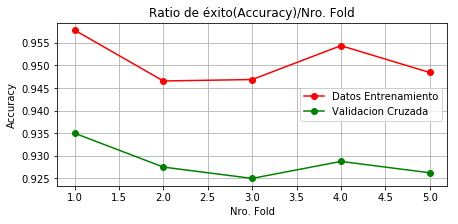

In [25]:
graficar_accuracy_scores(class_svm,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## 7. Pasos clasificación método redes de neuronas

In [27]:
df_data_rnn = pd.concat([df_var_numericas,df_var_no_numericas],axis=1)
columnas_x=df_data_rnn.columns.difference(['PROFILE'])
X=df_data_rnn[columnas_x]
Y=df_data_rnn['PROFILE']

In [28]:
train_x,test_x,train_y,test_y=train_test_split(X,Y,test_size=0.2, random_state = semilla_aleatoria)

In [29]:
class_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),max_iter=1500, random_state=semilla_aleatoria)
class_mlp.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 100, 100), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predicción del modelo.

In [30]:
predEY_class_mlp = class_mlp.predict(test_x)

In [31]:
display(confusion_matrix(test_y,predEY_class_mlp))
class_report=classification_report(test_y,predEY_class_mlp)
print(class_report)

array([[606,  20,   4,  16,  10,   2],
       [  9, 604,   7,  18,  21,  10],
       [  3,   7, 645,  13,   9,   8],
       [ 13,   9,  10, 607,  16,   4],
       [  6,  11,   4,  15, 615,   6],
       [ 13,  10,   9,  13,   8, 619]])

                       precision    recall  f1-score   support

     advanced_backend       0.93      0.92      0.93       658
advanced_data_science       0.91      0.90      0.91       669
   advanced_front_end       0.95      0.94      0.95       685
     beginner_backend       0.89      0.92      0.91       659
beginner_data_science       0.91      0.94      0.92       657
   beginner_front_end       0.95      0.92      0.94       672

            micro avg       0.92      0.92      0.92      4000
            macro avg       0.92      0.92      0.92      4000
         weighted avg       0.92      0.92      0.92      4000



In [32]:
from sklearn.metrics import accuracy_score

# Precisión lograda por el árbol de decisiones
print("Exactitud: {}%".format(100*round(accuracy_score(test_y, predEY_class_mlp), 2)))

Exactitud: 92.0%


## Kfolds

array([0.9234375, 0.9234375, 0.9125   , 0.9153125, 0.9128125])

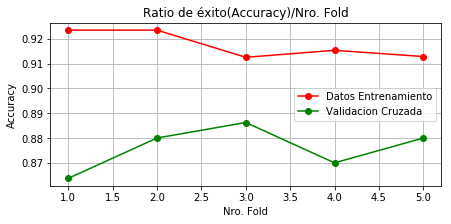

In [33]:
graficar_accuracy_scores(class_mlp,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

## Con Datos Normalizados y Columnas Binarias

In [34]:
df_data = pd.concat([df_var_numericas,df_encoder],axis=1)
columnas_x=df_data.columns.difference(['PROFILE_c'])
X=df_data[columnas_x]
X_escaler = StandardScaler().fit(X).transform(X.astype(float))
enc = OneHotEncoder(sparse=False,categories='auto')
Y_hot_encoder = enc.fit_transform(df_data[['PROFILE_c']])

In [35]:
train_x,test_x,train_y,test_y=train_test_split(X_escaler,Y_hot_encoder,test_size=0.2, random_state = semilla_aleatoria)

In [36]:
class_mlp_os = MLPClassifier(hidden_layer_sizes=[20]*4,max_iter=1500, random_state=semilla_aleatoria)
class_mlp_os.fit(train_x,train_y)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=[20, 20, 20, 20], learning_rate='constant',
       learning_rate_init=0.001, max_iter=1500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1234, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

### Predicción del modelo.

In [37]:
predEY_class_mlp = class_mlp_os.predict(test_x)
display(predEY_class_mlp)

array([[0, 0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       ...,
       [0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1],
       [0, 0, 0, 1, 0, 0]])

In [38]:
from sklearn.metrics import accuracy_score
inv_y = enc.inverse_transform(test_y)
inv_ey = enc.inverse_transform(predEY_class_mlp)
# Precisión lograda por el árbol de decisiones
print("Exactitud: {}%".format(100*round(accuracy_score(inv_y, inv_ey), 2)))

Exactitud: 95.0%


In [39]:
display(confusion_matrix(inv_y,inv_ey))
class_report=classification_report(inv_y,inv_ey)
print(class_report)

array([[639,   5,   4,   4,   5,   1],
       [ 20, 631,   4,   5,   5,   4],
       [ 14,   6, 643,  10,   1,  11],
       [ 16,   2,   4, 624,   8,   5],
       [ 13,   5,   7,   6, 620,   6],
       [  8,   7,   9,   4,   6, 638]])

              precision    recall  f1-score   support

           0       0.90      0.97      0.93       658
           1       0.96      0.94      0.95       669
           2       0.96      0.94      0.95       685
           3       0.96      0.95      0.95       659
           4       0.96      0.94      0.95       657
           5       0.96      0.95      0.95       672

   micro avg       0.95      0.95      0.95      4000
   macro avg       0.95      0.95      0.95      4000
weighted avg       0.95      0.95      0.95      4000



### kFOLDS

array([0.93     , 0.931875 , 0.9321875, 0.940625 , 0.93125  ])

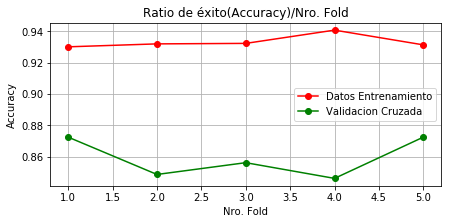

In [40]:
graficar_accuracy_scores(class_mlp_os,train_x,train_y,test_x,test_y,nparts=5,jobs=2)

<hr>

Este notebook demostró cómo trabajar con transformaciones y modelos con la biblioteca scikit-learn. Se recomienda que el participante realice sus experimentos editando el código proporcionado aquí hasta lograr un modelo con alta precisión.

Cuando esté satisfecho con su modelo, puede pasar al segundo paso del desafío: encapsular su modelo como una API REST lista para usar con Watson Machine Learning.

El notebook para la segunda etapa ya está en este proyecto, simplemente acceda a la pestaña **ASSETS** e inícielo. No olvide apagar primero el Kernel en este portátil para reducir el consumo de su nivel gratuito de IBM Cloud Pak for Data.